In [813]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy.stats import norm

# Simulation

In [814]:
n=10000

In [815]:
def simulateRW(sims=10,n=360,vol=0.3,r=0.05,dt=1,S0=1):
    t = dt/n
    rfe = np.exp(r*t)
    u = np.exp(vol*np.sqrt(t))
    d = np.exp(-vol*np.sqrt(t))
    p = (rfe-d)/(u-d)
    arrpricehist = []
    for j in range(sims):
        S=S0
        rr = np.random.random(n)
        pricehist = []
        for i in range(n):
            if p<rr[i]:
                S=S*u
                pricehist.append(S)
            else:
                S=S*d
                pricehist.append(S)

        arrpricehist.append(pricehist)
    return pd.DataFrame(arrpricehist).T

def checkStrike(results=results_df,K=1.2):
    return (results[-1:]>K).sum().sum() / results[-1:].count().sum()

In [816]:
results_df = simulateRW(sims=1000,n=n)

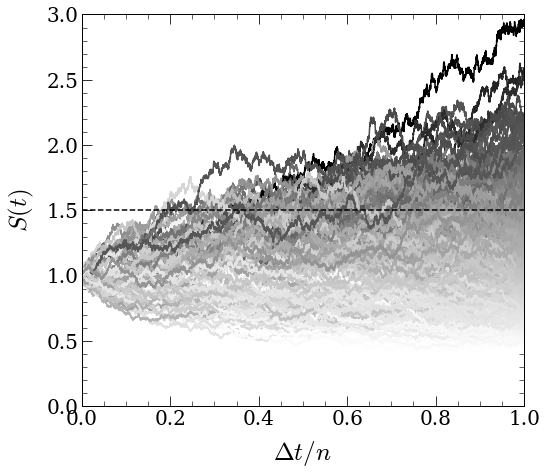

In [817]:
# frame
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_size_inches(8, 7)
maxval = results_df[-1:].max().max()
minval = results_df[-1:].min().min()
for i in range(len(results_df.columns)):
    plt.plot(list(np.arange(0,1,1/n)),results_df[i], c=str(((list(results_df[-1:][i])[0] - maxval)/(minval-maxval))))
plt.axhline(y=1.5, color='black', linestyle='--')    
    
# font
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["axes.edgecolor"] = "black"

ax.tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax.tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)

# limits
ax.set_ylim(0, 3)
ax.set_xlim(0, 1)

ax.set_ylabel(r'$S(t)$', labelpad=10, fontsize=25)
ax.set_xlabel(r'$\Delta t /n$', labelpad=10, fontsize=25)

# X-axis MARKS
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

# Y-axis MARKS
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

# plt.savefig('C:/Users/costa/Downloads/paper_1.png', format='png',transparent=True, dpi=300)
plt.show()

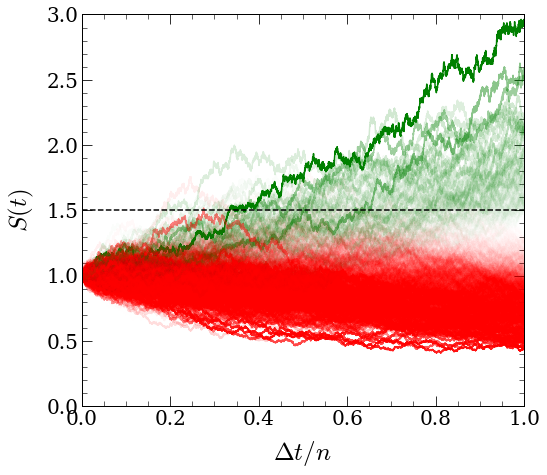

In [818]:
# frame
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_size_inches(8, 7)
maxval = results_df[-1:].max().max()
minval = results_df[-1:].min().min()
for i in range(len(results_df.columns)):
    if list(results_df[-1:][i])[0]>1.5:
        plt.plot(list(np.arange(0,1,1/n)),results_df[i], color='green', alpha=((list(results_df[-1:][i])[0] - minval)/(maxval-minval))**5)
    else:
        plt.plot(list(np.arange(0,1,1/n)),results_df[i], color='red', alpha=((list(results_df[-1:][i])[0] - maxval)/(minval-maxval))**15) 

plt.axhline(y=1.5, color='black', linestyle='--')
    
    
# font
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["axes.edgecolor"] = "black"

ax.tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax.tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)

# limits
ax.set_ylim(0, 3)
ax.set_xlim(0, 1)

ax.set_ylabel(r'$S(t)$', labelpad=10, fontsize=25)
ax.set_xlabel(r'$\Delta t /n$', labelpad=10, fontsize=25)

# X-axis MARKS
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

# Y-axis MARKS
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
        
# plt.savefig('C:/Users/costa/Downloads/paper_2.png', format='png',transparent=True, dpi=300)
plt.show()

In [819]:
{
"k=0.55": checkStrike(results_df,K=0.55),
"k=1.00": checkStrike(results_df,K=1.00) , 
"k=1.05": checkStrike(results_df,K=1.05) , 
"k=1.20": checkStrike(results_df,K=1.2),
"k=1.50": checkStrike(results_df,K=1.5), 
"k=1.81": checkStrike(results_df,K=1.81)
}

{'k=0.55': 0.973,
 'k=1.00': 0.464,
 'k=1.05': 0.403,
 'k=1.20': 0.257,
 'k=1.50': 0.086,
 'k=1.81': 0.032}

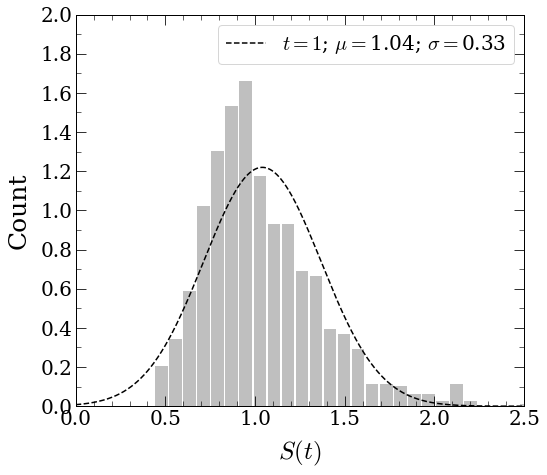

In [820]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_size_inches(8, 7)

q25, q75 = np.percentile(results_df[-1:], [25, 75])
bin_width = 2 * (q75 - q25) * len(list(results_df[-1:])) ** (-1/3)

# fit norm
x = np.linspace(0,3,1000)
mean, std  = stats.distributions.norm.fit(results_df[-1:])
fitted_data = stats.distributions.norm.pdf(x, mean, std)
plt.plot(x,fitted_data,'k--', label='$t = 1$; $\mu =$'+str(np.round(mean,2))+'; $\sigma =$'+str(np.round(std,2)))

# plt.axvline(x=1.03, color='black', linestyle='-')

bins = round((results_df[-1:].max().max() - results_df[-1:].min().min()) / bin_width)
plt.hist(results_df[-1:].T, density=True, bins=bins, alpha=0.5,rwidth=0.9, color = 'gray')

ax.tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax.tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)

# font
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["axes.edgecolor"] = "black"

# limits
ax.set_ylim(0, 2)
ax.set_xlim(0, 2.5)

# X-axis MARKS
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

# Y-axis MARKS
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

ax.set_xlabel(r'$S(t)$', labelpad=10, fontsize=25)
ax.set_ylabel(r'Count', labelpad=10, fontsize=25)

plt.legend()

plt.savefig('C:/Users/costa/Downloads/paper_3.png', format='png',transparent=True, dpi=300)
plt.show()

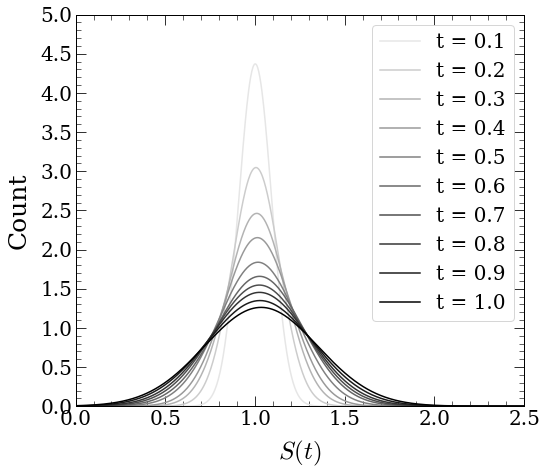

In [821]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_size_inches(8, 7)


x = np.linspace(0,3,1000)

tabledata = []

for i in results_df.T:
    if i%1000==0 and i>10:
        vali = i+999
#         print(vali)
        fitted_data = stats.distributions.norm.pdf(x, normal_data[vali][1], normal_data[vali][2])
        plt.plot(x,fitted_data, c=str(1-normal_data[vali][0]/n), label="t = "+str(np.round(vali/n,2)))
        tabledata.append([np.round(vali/n,2), normal_data[vali][1], normal_data[vali][2]])
    elif i == 999:
        fitted_data = stats.distributions.norm.pdf(x, normal_data[i][1], normal_data[i][2])
        plt.plot(x,fitted_data, c=str(1-normal_data[i][0]/n), label="t = "+str(np.round(i/n,2)))
        tabledata.append([np.round(i/n,2), normal_data[i][1], normal_data[i][2]])
        

# plt.axvline(x=1.03, color='black', linestyle='-')


ax.tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax.tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)

# font
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["axes.edgecolor"] = "black"

# limits
ax.set_ylim(0, 5)
ax.set_xlim(0, 2.5)

# X-axis MARKS
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

# Y-axis MARKS
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

ax.set_xlabel(r'$S(t)$', labelpad=10, fontsize=25)
ax.set_ylabel(r'Count', labelpad=10, fontsize=25)

plt.legend()

plt.savefig('C:/Users/costa/Downloads/paper_4.png', format='png',transparent=True, dpi=300)
plt.show()

In [822]:
pd.DataFrame(np.round(tabledata,2))

,0,1,2
0,0.1,1,0.09
1,0.2,1.01,0.13
2,0.3,1.01,0.16
3,0.4,1.01,0.19
4,0.5,1.02,0.22
5,0.6,1.03,0.24
6,0.7,1.02,0.26
7,0.8,1.03,0.27
8,0.9,1.03,0.3
9,1,1.03,0.32


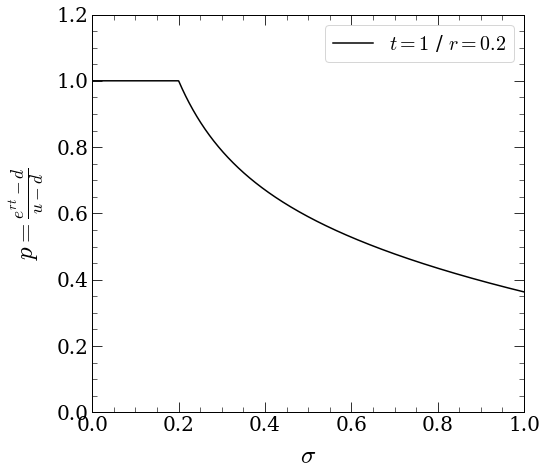

In [823]:
vol1 = np.linspace(0,1,1000)
t1=1
r1=0.2

rfe1 = np.exp(r1*t1)
u1 = np.exp(vol1*np.sqrt(t1))
d1 = np.exp(-vol1*np.sqrt(t1))
p1 = (rfe-d)/(u-d)

for x in range(len(p1)):
    if p1[x]>1:
        p1[x] = 1
        
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_size_inches(8, 7)

plt.plot(vol1,p1, 'k-', label='$t=1$ / $r=0.2$')

ax.tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax.tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)

# font
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["axes.edgecolor"] = "black"

# limits
ax.set_ylim(0, 1.2)
ax.set_xlim(0, 1)

# X-axis MARKS
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

# Y-axis MARKS
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

ax.set_xlabel(r'$\sigma$', labelpad=10, fontsize=25)
ax.set_ylabel(r'$p = \frac{e^{rt}-d}{u-d}$', labelpad=10, fontsize=25)

plt.legend()

plt.savefig('C:/Users/costa/Downloads/paper_5.png', format='png',transparent=True, dpi=300)
plt.show()